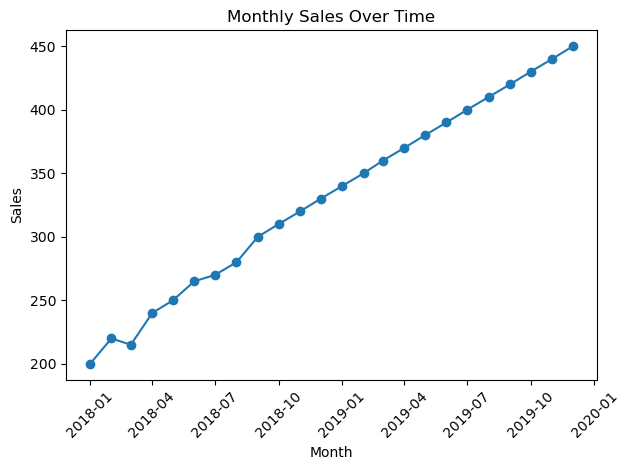

Actual Sales: [430 440 450]
Predicted Sales: [435.45238095 446.38095238 457.30952381]
RMSE: 6.425837161020694


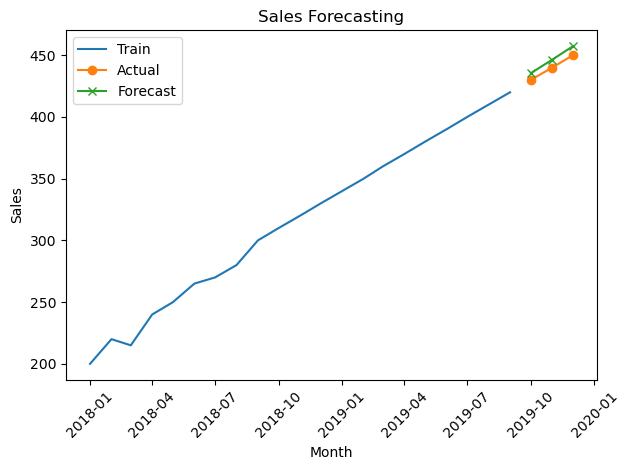

In [5]:
# Sales Forecasting using Linear Regression 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import os

# Load dataset
cwd = os.getcwd()
file_path = os.path.join(cwd,'data\monthly_sales.csv')
df = pd.read_csv(file_path)
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values('Month')

# Create a time index feature
df['TimeIndex'] = np.arange(len(df))

# Plot sales over time
plt.figure()
plt.plot(df['Month'], df['Sales'], marker='o')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Split into train and test
train = df[:-3]
test = df[-3:]

X_train = train[['TimeIndex']]
y_train = train['Sales']
X_test = test[['TimeIndex']]
y_test = test['Sales']

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, preds) ** 0.5
print("Actual Sales:", y_test.values)
print("Predicted Sales:", preds)
print("RMSE:", rmse)

# Plot forecast vs actual
plt.figure()
plt.plot(train['Month'], train['Sales'], label='Train')
plt.plot(test['Month'], test['Sales'], label='Actual', marker='o')
plt.plot(test['Month'], preds, label='Forecast', marker='x')
plt.title("Sales Forecasting")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
